In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
import time
import traceback
from datetime import datetime 

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    time.sleep(1)
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_current_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as e:
        print (e)
        print(traceback.format_exc())
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | gimli
Processing Record 7 of Set 1 | taolanaro
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | broome
Processing Record 10 of Set 1 | krivyanskaya
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bathsheba
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | kachikau
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not fou

Processing Record 45 of Set 3 | kununurra
Processing Record 46 of Set 3 | comodoro rivadavia
Processing Record 47 of Set 3 | codrington
Processing Record 48 of Set 3 | beira
Processing Record 49 of Set 3 | la primavera
Processing Record 50 of Set 3 | gao
Processing Record 1 of Set 4 | longyearbyen
Processing Record 2 of Set 4 | san patricio
Processing Record 3 of Set 4 | samusu
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 4 of Set 4 | cagayan de tawi-tawi
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 5 of Set 4 | hithadhoo
Processing Record 6 of Set 4 | chuy
Processing Record 7 of Set 4 | bubaque
Processing Record 8 of Set 4 | donskoye
Processing Record 9

Processing Record 23 of Set 6 | quatre cocos
Processing Record 24 of Set 6 | malinovoye ozero
Processing Record 25 of Set 6 | bhadrak
Processing Record 26 of Set 6 | cabo san lucas
Processing Record 27 of Set 6 | aklavik
Processing Record 28 of Set 6 | cordoba
Processing Record 29 of Set 6 | valparaiso
Processing Record 30 of Set 6 | druzhba
Processing Record 31 of Set 6 | roebourne
Processing Record 32 of Set 6 | tartagal
Processing Record 33 of Set 6 | fonte boa
Processing Record 34 of Set 6 | hervey bay
Processing Record 35 of Set 6 | marsaxlokk
Processing Record 36 of Set 6 | shache
Processing Record 37 of Set 6 | waitati
Processing Record 38 of Set 6 | meulaboh
Processing Record 39 of Set 6 | saint-georges
Processing Record 40 of Set 6 | port hardy
Processing Record 41 of Set 6 | varhaug
Processing Record 42 of Set 6 | puerto escondido
Processing Record 43 of Set 6 | lebu
Processing Record 44 of Set 6 | salinas
Processing Record 45 of Set 6 | provideniya
Processing Record 46 of Se

Processing Record 30 of Set 9 | andenes
Processing Record 31 of Set 9 | san andres
Processing Record 32 of Set 9 | duobao
Processing Record 33 of Set 9 | nortelandia
Processing Record 34 of Set 9 | madison
Processing Record 35 of Set 9 | puerto baquerizo moreno
Processing Record 36 of Set 9 | shirokiy
Processing Record 37 of Set 9 | am timan
Processing Record 38 of Set 9 | inhambane
Processing Record 39 of Set 9 | sao mateus
Processing Record 40 of Set 9 | himora
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 41 of Set 9 | novospasskoye
Processing Record 42 of Set 9 | suntar
Processing Record 43 of Set 9 | pringsewu
Processing Record 44 of Set 9 | tosya
Processing Record 45 of Set 9 | konosha
Processing Record 46 of Set 9 | general roca
Processing Record 47 of Set 9 | cockburn town
Processing Record 48 of Set 9 | anloga
P

Processing Record 14 of Set 12 | san jeronimo
Processing Record 15 of Set 12 | halalo
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 16 of Set 12 | invermere
Processing Record 17 of Set 12 | ribeira brava
Processing Record 18 of Set 12 | carmo do rio verde
Processing Record 19 of Set 12 | najran
Processing Record 20 of Set 12 | kashary
Processing Record 21 of Set 12 | yagodnoye
Processing Record 22 of Set 12 | qaqortoq
Processing Record 23 of Set 12 | royal tunbridge wells
Processing Record 24 of Set 12 | mizpe ramon
'coord'
Traceback (most recent call last):
  File "<ipython-input-9-b061af24e549>", line 31, in <module>
    city_lat = city_weather["coord"]["lat"]
KeyError: 'coord'

City not found. Skipping...
Processing Record 25 of Set 12 | mariental
Processing Record 26 of Set 12 | bria
Processing Record 27 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,27.00,75,100,5.32,US,2021-02-07 16:56:41
1,Mataura,-46.1927,168.8643,51.69,87,99,1.79,NZ,2021-02-07 16:55:29
2,Ribeira Grande,38.5167,-28.7000,62.60,72,20,20.71,PT,2021-02-07 16:49:32
3,Isangel,-19.5500,169.2667,77.36,80,23,3.78,VU,2021-02-07 16:59:48
4,Busselton,-33.6500,115.3333,63.00,98,99,11.95,AU,2021-02-07 16:52:57
5,Gimli,50.6336,-96.9907,-23.80,57,1,11.50,CA,2021-02-07 16:58:31
6,Hobart,-42.8794,147.3294,55.40,62,90,9.22,AU,2021-02-07 16:52:49
7,Broome,42.2506,-75.8330,33.01,86,90,4.61,US,2021-02-07 16:59:53
8,Krivyanskaya,47.3963,40.1662,19.40,63,0,6.71,RU,2021-02-07 16:59:54
9,Rikitea,-23.1203,-134.9692,77.27,72,95,11.77,PF,2021-02-07 16:52:54


In [11]:
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'] 

In [14]:
city_data_df = city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-02-07 16:56:41,42.6001,-73.9662,27.00,75,100,5.32
1,Mataura,NZ,2021-02-07 16:55:29,-46.1927,168.8643,51.69,87,99,1.79
2,Ribeira Grande,PT,2021-02-07 16:49:32,38.5167,-28.7000,62.60,72,20,20.71
3,Isangel,VU,2021-02-07 16:59:48,-19.5500,169.2667,77.36,80,23,3.78
4,Busselton,AU,2021-02-07 16:52:57,-33.6500,115.3333,63.00,98,99,11.95
...,...,...,...,...,...,...,...,...,...
562,Bandiagara,ML,2021-02-07 17:11:14,14.3501,-3.6104,90.37,13,59,15.12
563,North Platte,US,2021-02-07 17:06:49,41.1239,-100.7654,3.20,78,90,18.41
564,Kloulklubed,PW,2021-02-07 17:11:16,7.0419,134.2556,75.20,100,90,6.91
565,Requena,ES,2021-02-07 17:11:17,39.4883,-1.1004,60.01,49,53,20.67


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Get today's date in seconds.
today = time.time()
today

1612718758.168395

In [19]:
today = time.strftime("%x")
today

'02/07/21'

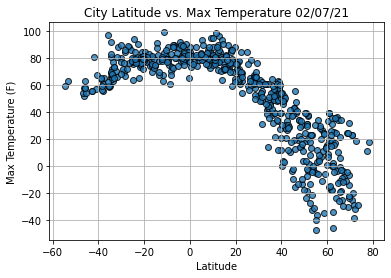

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

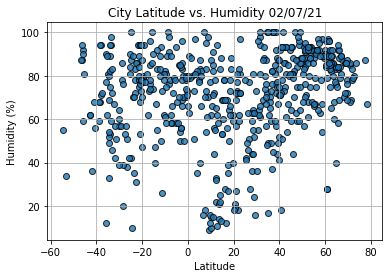

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

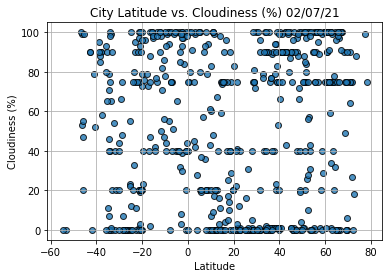

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

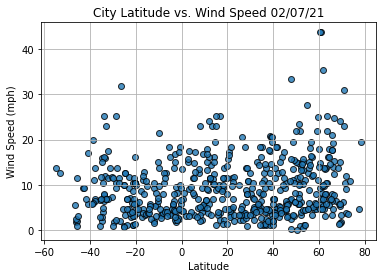

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                     Vinh Yen
Country                        VN
Date          2021-02-07 17:00:05
Lat                         21.31
Lng                       105.597
Max Temp                     71.6
Humidity                       73
Cloudiness                     41
Wind Speed                   3.44
Name: 13, dtype: object

In [57]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Mataura,NZ,2021-02-07 16:55:29,-46.1927,168.8643,51.69,87,99,1.79
3,Isangel,VU,2021-02-07 16:59:48,-19.5500,169.2667,77.36,80,23,3.78
4,Busselton,AU,2021-02-07 16:52:57,-33.6500,115.3333,63.00,98,99,11.95
6,Hobart,AU,2021-02-07 16:52:49,-42.8794,147.3294,55.40,62,90,9.22
9,Rikitea,PF,2021-02-07 16:52:54,-23.1203,-134.9692,77.27,72,95,11.77


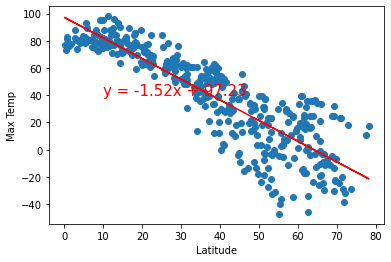

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

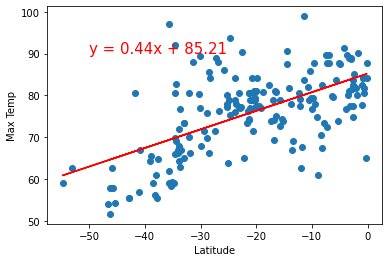

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [42]:
from scipy.stats import linregress

In [47]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

LinregressResult(slope=0.44402835981836847, intercept=85.2095480907852, rvalue=0.6015335671946299, pvalue=1.72348738619376e-19, stderr=0.04370982238581002)

In [46]:
linregress (northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.517323840590435, intercept=97.2338689791572, rvalue=-0.8702565550153555, pvalue=3.2443829044161787e-119, stderr=0.04400092394208556)

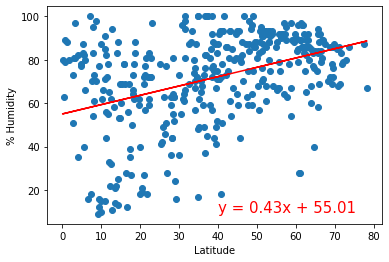

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for the % Humidity', '% Humidity',(40,10))

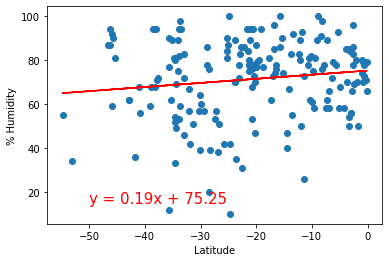

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southen Hemisphere \
                        for the % Humidity', '% Humidity',(-50,15))

In [54]:
linregress (northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

LinregressResult(slope=0.42954012931491514, intercept=55.01423672465408, rvalue=0.4017262640229147, pvalue=2.756363185510872e-16, stderr=0.050164051391798005)

In [55]:
linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

LinregressResult(slope=0.1868460556928937, intercept=75.25225519649791, rvalue=0.13668197224132853, pvalue=0.06429886231104814, stderr=0.10037877575377942)

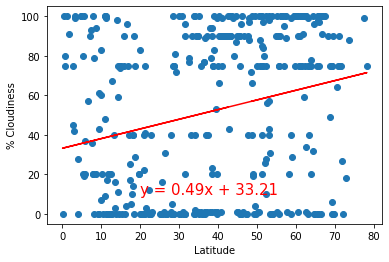

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for the % Cloudiness', '% Cloudiness',(20,10))

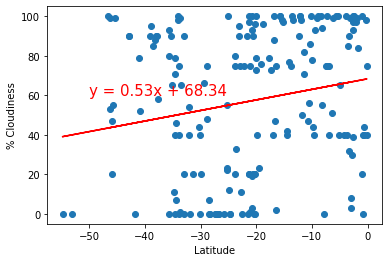

In [59]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for the % Cloudiness', '% Cloudiness',(-50,60))

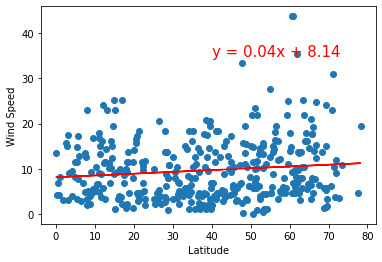

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

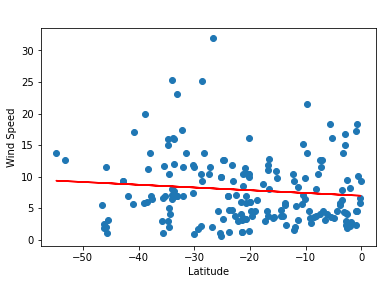

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the \
                       Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))